## Inroduction to Probabilistic Machine Learning  

Family name: Domínguez 

Name: Iván

Date: 6-2-2026

### The exponential distribution
Given an exponential random variable whose pdf is
$$
\text{exp\_pdf}\left(x, \lambda \right) = \frac{1}{Z(\lambda)} \exp\left(- \lambda x \right)
$$

[TODO] Derive using markdown + latex:
1. The normalization constant $ Z(\lambda)$

Para normalizar la exp_pdf deberíamos tener en cuenta que 

$$ \int_{- \infty}^{\infty} dx \ \text{exp\_pdf}(x;\lambda) = 1 $$

Y por la propia definción de la función tenemos que:

$$ \frac{1}{Z(\lambda)}\int_{0}^{\infty} dx \exp(-\lambda x) = 1 \to \frac{1}{-\lambda Z(\lambda)} \int_{0}^{\infty} dx -\lambda \exp(-\lambda x) = $$

$$ = \frac{1}{-\lambda Z(\lambda)} [\exp(-\lambda x)]_{0}^{\infty} =  \frac{1}{-\lambda Z(\lambda)} (0-1) = 1 \to Z(\lambda) = \frac{1}{\lambda}$$

Y por tanto, la pdf quedaría tal que:

$$
\text{exp\_pdf}\left(X, \lambda \right) = \lambda \exp\left(- \lambda x \right)
$$

2. The cdf

$$

\text{exp\_cdf}(X) = \int_{-\infty}^x dx' \text{exp\_pdf}(x') = \int_{-\infty}^x dx' \lambda \exp(-\lambda x') = 1 - \exp(-\lambda x)


$$

3. The inverse cdf

$$

y = 1- \exp(-\lambda x) \to \exp(-\lambda x) = y-1 \to x = \frac{1}{-\lambda} \log(y-1)

$$

Luego la inversa de la cdf será:

$$

\text{exp\_cdf}^{-1}(x) = \frac{1}{-\lambda} \log(x-1)

$$

In [28]:
import numpy as np
import matplotlib.pyplot as plt

from tools import exp_distribution, probabilistic_fit

### Method of the inverse

Para generar números aleatorios que se distribuyan según la exponencial, el método del inverso es muy útil. La idea es la siguiente:

La función $CDF$ devuelve la probabilidad (en el intervalo $[0, 1]$) de que una variable aleatoria $X$ tome un valor concreto $x$: 

$$

\text{exp\_cdf}: \mathbb{R} \to [0,1]  \ \text{tq} \ \text{exp\_cdf}(x) = P(X\leq x)

$$

Para coneguir números aleatorios distribuidos según nuestra $\text{exp\_pdf}$, la idea a seguir es mapear, utilizando la inversa de $\text{exp\_pdf}$, $\text{exp\_cdf}^{-1}$, puntos distribuidos uniformemente en el intervalo $[0,1]$ a la $\text{exp\_pdf}$. Definimos la $\text{exp\_pdf}^{-1}$ tal que:


$$

\text{exp\_cdf}: [0,1] \to \mathbb{R}  \ \text{tq} \ \text{exp\_cdf}^{-1}(x) = \frac{1}{-\lambda} \log(y-1)

$$

Dicho con otras palabras: aplicando esta función a cada punto del intervalo original $[0,1]$, distribuido uniformemente, obtendremos un conjunto de puntos de igual tamaño, pero distribuidos de forma exponencial, en lugar de uniforme. 

In [35]:
# [TODO] Generate an iid sample of the exponential distribution using the method of the inverse 

rng = np.random.default_rng(123)
lam_true = 1.5
N = 100000

# Creamos N números aleatorios distribuidos uniformemente en el intervalo [0, 1):

X = rng.random(size=N)

# Creamos una función para aplicar a cada valor del array la cdf inversa:

vectorize_exp = np.vectorize(exp_distribution.exp_inv)

# Creamos un nuevo array para los nuevos valores. Usamos el lambda dado:

X_exp = vectorize_exp(X, lam=lam_true)

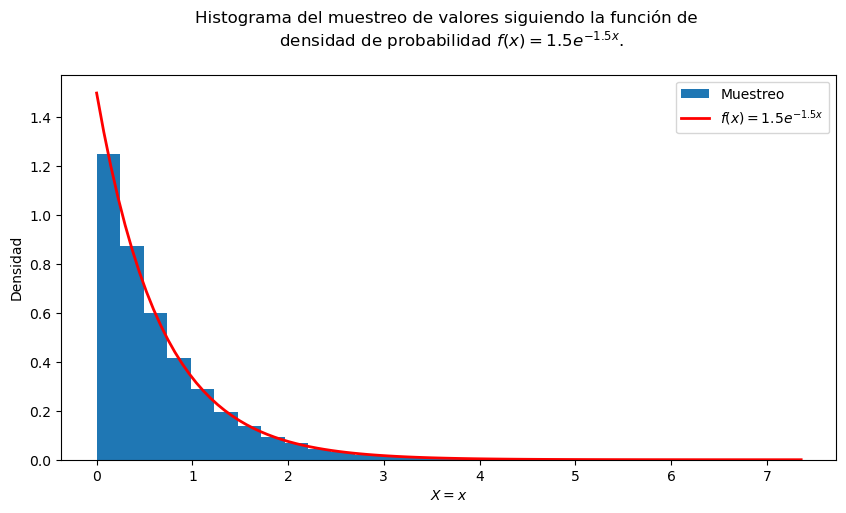

In [59]:
# [TODO] Plot the sample histogram and compare with pdf

import matplotlib.pyplot as plt

x_teorico = np.linspace(min(X_exp), max(X_exp), 100)
y_teorico = 1.5 * np.exp(-1.5 * x_teorico)

plt.figure(figsize=(10, 5))
plt.hist(X_exp, density=True, bins=30, label='Muestreo')
plt.xlabel('$X=x$')
plt.ylabel('Densidad')
plt.title('Histograma del muestreo de valores siguiendo la función de \n densidad de probabilidad $f(x) = 1.5 e^{-1.5x}$.\n')
plt.plot(x_teorico, y_teorico, color='red', lw=2, label='$f(x) = 1.5 e^{-1.5x}$')
plt.legend();

## Maximum Likelihood estimate of lambda

[TODO] Derive using markdown + latex:
1. The expression of the likelihood function for the iid sample $ \mathcal{D} = \left\{X_n \right\}_{n=1}^N$
2. The value of $\lambda$ that maximizes the likelihood
3. The expression of the posterior assuming the prior for lambda 

The likelihood is
$$
L(\lambda) = \lambda^N e^{-\lambda \sum_{n=1}^N x_n}
$$

The log-likelihood corresponding is
$$
\ell(\lambda)
= \log L(\lambda)
= N \log \lambda - \lambda \sum_{n=1}^N x_n.
$$

Taking the derivative with respect to \(\lambda\),
$$
\frac{d\ell(\lambda)}{d\lambda}
= \frac{N}{\lambda} - \sum_{n=1}^N x_n.
$$

Setting the derivative equal to zero gives
$$
\frac{N}{\lambda_{ML}^*} = \sum_{n=1}^N X_n,
$$
hence the maximum likelihood estimator is
$$
\lambda_{ML}^* = \frac{N}{\sum_{n=1}^N x_n}
= \frac{1}{\mathbb{E}[X]},
$$
where
$$
\mathbb{E}[X] = \frac{1}{N}\sum_{n=1}^N X_n.
$$

The second derivative,
$$
\frac{d^2\ell(\lambda)}{d\lambda^2}
= -\frac{N}{\lambda^2} < 0,
$$
confirms that this critical point is a maximum.


### Numerical optimization of the likelikood 

We shall now use a numerical method to optimize the likelihood and compare with the closed-form solution

In [31]:
# [TODO]
lam_mle_numerical = 
lam_mle_analytic = 

print(lam_mle_numerical, lam_exact_analytic)

SyntaxError: invalid syntax (3324284458.py, line 2)

## MAP estimate of lambda
Assume the conjugate prior
$$
\lambda \sim \mathrm{Gamma}(\alpha,\beta),
$$
with density
$$
p(\lambda) = \frac{\beta^\alpha}{\Gamma(\alpha)} \lambda^{\alpha-1} e^{-\beta \lambda}.
$$

[TODO] Derive using markdown + latex:
1. The expression of the posterior assuming the Gamma prior for $\lambda$. 
2. The value of $\lambda$ that maximizes the posterior.  



Multiplying the prior by the likelihood,
$$
p(\lambda \mid x)
\propto \lambda^{\alpha+n-1}
\exp\!\left[-\lambda\!\left(\beta + \sum_{i=1}^n x_i\right)\right].
$$
Hence,
$$
\lambda \mid x \sim \mathrm{Gamma}\!\left(
\alpha + n,\;
\beta + \sum_{i=1}^n x_i
\right).
$$

\paragraph{Posterior predictive distribution.}
The posterior predictive density for a new observation $x_{\mathrm{new}}$ is
$$
p(x_{\mathrm{new}} \mid x)
= \int_0^\infty p(x_{\mathrm{new}} \mid \lambda)\, p(\lambda \mid x)\, d\lambda.
$$
Substituting,
$$
p(x_{\mathrm{new}} \mid x)
= \int_0^\infty
\lambda e^{-\lambda x_{\mathrm{new}}}
\frac{(\beta')^{\alpha'}}{\Gamma(\alpha')}
\lambda^{\alpha'-1} e^{-\beta' \lambda}
\, d\lambda,
$$
where
$$
\alpha' = \alpha + n, \qquad
\beta' = \beta + \sum_{i=1}^n x_i.
$$
This simplifies to
$$
p(x_{\mathrm{new}} \mid x)
= \frac{(\beta')^{\alpha'}}{\Gamma(\alpha')}
\int_0^\infty
\lambda^{\alpha'} e^{-(\beta' + x_{\mathrm{new}})\lambda}
\, d\lambda.
$$
Using the Gamma integral,
$$
\int_0^\infty \lambda^{k-1} e^{-c\lambda} d\lambda
= \frac{\Gamma(k)}{c^k},
$$
we obtain
$$
p(x_{\mathrm{new}} \mid x)
= \frac{\alpha' (\beta')^{\alpha'}}{(\beta' + x_{\mathrm{new}})^{\alpha'+1}},
\quad x_{\mathrm{new}} \ge 0.
$$
This is a Lomax (Pareto type II) distribution.

\paragraph{MLE vs MAP.}
The log-likelihood is
$$
\ell(\lambda) = n \log \lambda - \lambda \sum_{i=1}^n x_i.
$$
Maximizing yields the MLE
$$
\hat{\lambda}_{\mathrm{MLE}}
= \frac{n}{\sum_{i=1}^n x_i}
= \frac{1}{\bar{x}}.
$$

The log-posterior is
$$
\log p(\lambda \mid x)
= (\alpha+n-1)\log \lambda
- (\beta + \sum_{i=1}^n x_i)\lambda + C.
$$
Maximizing gives the MAP estimator
$$
\hat{\lambda}_{\mathrm{MAP}}
= \frac{\alpha + n - 1}{\beta + \sum_{i=1}^n x_i},
\quad \alpha + n > 1.
$$

\paragraph{Comparison.}
$$
\hat{\lambda}_{\mathrm{MAP}}
\;\xrightarrow[n\to\infty]{}\;
\hat{\lambda}_{\mathrm{MLE}}.
$$
For finite samples, the MAP shrinks the estimate toward the prior mean
$\alpha/\beta$, while the MLE depends only on the data.


In [ ]:
### Numerical optimization of the likelikood 

We shall now use a numerical method to optimize the likelihoo

In [ ]:
# [TODO]
lam_map_numerical = 
lam_map_analytic = 

print(lam_mle_numerical, lam_map_analytic)